In [2]:
# Importing Libraries 
import pandas as pd
from datasets import load_dataset 
import matplotlib.pyplot as plt
# Loading Data
dataset = load_dataset ( 'lukebarousse/data_jobs')
df = dataset ['train'].to_pandas ()
# Data Cleanup
df['job_posted_date'] = pd.to_datetime (df ['job_posted_date'])

In [3]:
df_usa = df[df['job_country'] == "United States"]

In [9]:
df_usa['job_posted_monthly'] = df_usa['job_posted_date'].dt.strftime('%B')
df_usa['job_posted_monthly']

C:\Users\myloc\AppData\Local\Temp\ipykernel_2032\1303990423.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_usa['job_posted_monthly'] = df_usa['job_posted_date'].dt.strftime('%B')


0             June
3             July
5         November
6            March
9            April
            ...   
785673     October
785685        July
785692       April
785703     January
785705     January
Name: job_posted_monthly, Length: 206292, dtype: object

In [14]:
df_usa_pivot = df_usa.pivot_table(index= 'job_posted_monthly', columns = 'job_title_short', aggfunc = 'size')

In [15]:
df_usa_pivot.reset_index(inplace = True)

In [20]:
df_usa_pivot['month_no'] = pd.to_datetime(df_usa_pivot['job_posted_monthly'], format='%B').dt.month
df_usa_pivot['month_no']

0      4
1      8
2     12
3      2
4      1
5      7
6      6
7      3
8      5
9     11
10    10
11     9
Name: month_no, dtype: int32

In [22]:
df_usa_pivot.sort_values('month_no', inplace = True)

In [31]:
df_usa_pivot.set_index('job_posted_monthly', inplace = True)

In [27]:
df_usa_pivot.drop(columns = 'month_no', inplace = True)

In [32]:
df_usa_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_monthly,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


<Axes: xlabel='job_posted_monthly'>

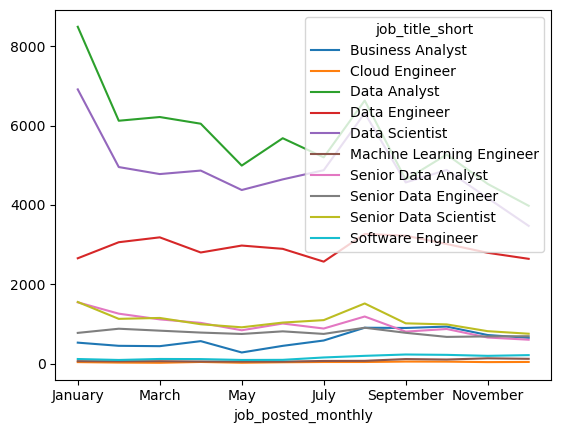

In [35]:
df_usa_pivot.plot(kind = 'line')

In [40]:
top_3 = df_usa['job_title_short'].value_counts().head(3)

In [41]:
top_3 = top_3.index.tolist()

In [42]:
top_3

['Data Analyst', 'Data Scientist', 'Data Engineer']

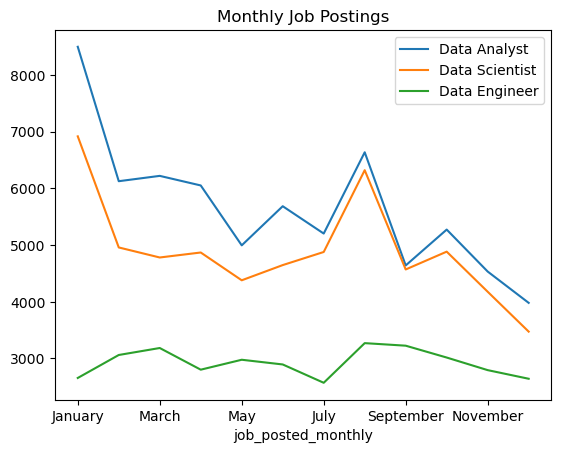

In [46]:
top_3_plot = df_usa_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings')
plt.legend()
